In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [2]:
data_no_ema = '../data/no-ema/pythia.jsonl'
sizes = [
        "pythia-70m-deduped", "pythia-160m-deduped",
        "pythia-410m-deduped", "pythia-1b-deduped",
        "pythia-1.4b-deduped", "pythia-2.8b-deduped",
        "pythia-6.9b-deduped", "pythia-12b-deduped"
    ]
ppl_df = pd.read_json(data_no_ema, lines=True)
ppl_df['label'] = np.where(ppl_df['numscores'] < 3, 0, 1)
for size in sizes:
    res = scipy.stats.spearmanr(ppl_df[f"{size}_ppl"], ppl_df['numscores'])
    print(f"{size}\nSpearman rho: {res[0]:.3f}\tp-value: {res[1]:.3f}")

pythia-70m-deduped
Spearman rho: -0.047	p-value: 0.409
pythia-160m-deduped
Spearman rho: -0.071	p-value: 0.215
pythia-410m-deduped
Spearman rho: -0.049	p-value: 0.387
pythia-1b-deduped
Spearman rho: -0.066	p-value: 0.248
pythia-1.4b-deduped
Spearman rho: -0.047	p-value: 0.415
pythia-2.8b-deduped
Spearman rho: -0.054	p-value: 0.347
pythia-6.9b-deduped
Spearman rho: -0.042	p-value: 0.456
pythia-12b-deduped
Spearman rho: -0.038	p-value: 0.500


In [3]:
def plot_global_ppl(df):
    plt.figure(figsize=(16,8))
    ppl_columns = [col for col in df.columns if col.endswith("_ppl")]
    df_long = pd.melt(df, 
                      id_vars=['numscores'],
                      value_vars=ppl_columns,
                      var_name='Model Size',
                      value_name='Perplexity')
    df_long['Model Size'] = df_long['Model Size'].str.split("_").str[0]
    sns.lineplot(data=df_long,
                x='numscores',
                y='Perplexity',
                hue='Model Size',
                style='Model Size',
                markers=True,
                dashes=False,
                errorbar=('ci', 95),
                )
    plt.xlabel('TALD', fontsize=18)
    plt.ylabel('Perplexity', fontsize=18)
    plt.legend(title='Model Size', bbox_to_anchor=(0.85, 1), loc='upper left',
               fontsize=18, title_fontsize=20)
    plt.tight_layout()
    return plt

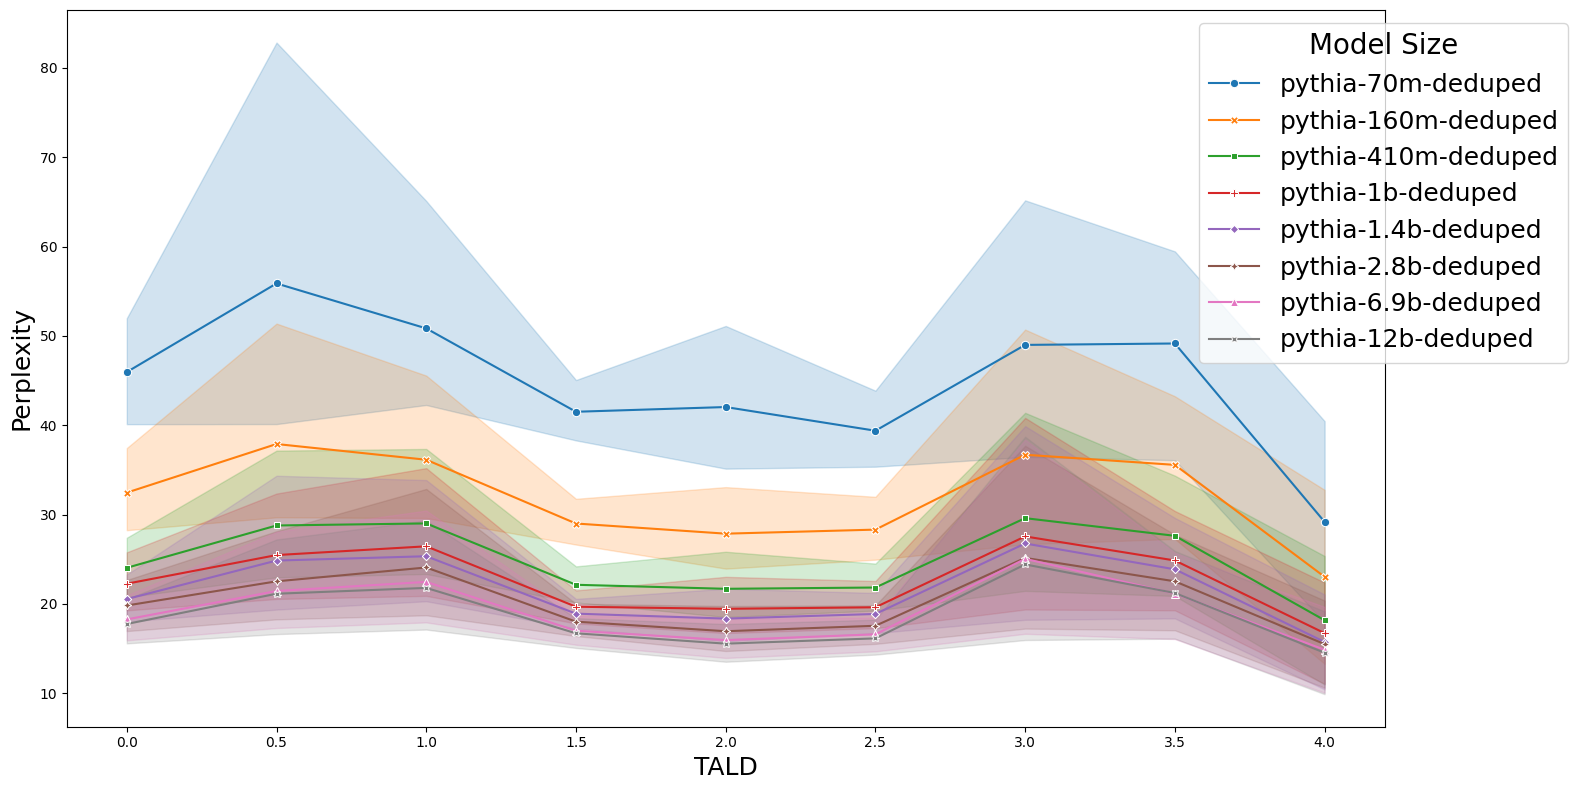

In [4]:
plot = plot_global_ppl(ppl_df)
# plot.show()
plot.savefig("../figs/global_ppl.pdf", dpi=300)